# Projeto de Estatística II


## Parte I - Regressão Linear

-------------------------------

**Instruções:**

- A primeira parte do projeto engloba a avliação dos tópicos de regressão linear.
- Ela deve ser entregue até o dia 26/04/2022.
- Para a entrega, salve seu notebook na pasta Projetos do nosso drive com o nome do notebook com o seguinte padrão: [primeiro nome]_[sobrenome]_projeto_estatistica_II_parteI.ipynb
- A avaliação será registrada nos notebooks em formato de comentários.
-------------------------------

O dataset 'cancer_EUA.csv' relaciona a taxa de mortalidade por câncer em alguns condados dos EUA e outras features destes condados.

Dicionário dos dados:

* TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities

* avgAnnCount: Mean number of reported cases of cancer diagnosed annually

* avgDeathsPerYear: Mean number of reported mortalities due to cancer

* incidenceRate: Mean per capita (100,000) cancer diagoses

* medianIncome: Median income per county

* popEst2015: Population of county

* povertyPercent: Percent of populace in poverty

* studyPerCap: Per capita number of cancer-related clinical trials per county

* binnedInc: Median income per capita binned by decile

* MedianAge: Median age of county residents

* MedianAgeMale: Median age of male county residents

* MedianAgeFemale: Median age of female county residents

* Geography: County name

* AvgHouseholdSize: Mean household size of county

* PercentMarried: Percent of county residents who are married

* PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school

* PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

* PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college

* PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

* PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

* PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

* PctEmployed16_Over: Percent of county residents ages 16 and over employed

* PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

* PctPrivateCoverage: Percent of county residents with private health coverage

* PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

* PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

* PctPublicCoverage: Percent of county residents with government-provided health coverage

* PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone

* PctWhite: Percent of county residents who identify as White

* PctBlack: Percent of county residents who identify as Black

* PctAsian: Percent of county residents who identify as Asian

* PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

* PctMarriedHouseholds: Percent of married households

* BirthRate: Number of live births relative to number of women in county

O objetivo da primeira parte do projeto é criar um modelo linear para prever o target (TARGET_deathRate). Para isso, siga o passo a passo abaixo e apresente seus raciocínios e resultados. 

1. Antes de qualquer exploração dos dados, leia o dicionário dos dados e reflita sobre a feature que você acredita ser mais correlacionada com o target. (Sem medo de errar. Não existe certo ou errado nesta questão.) 

## povertyPercent: Percent of populace in poverty

Acredito que essa feature é a mais correlacionada com o target pois se trata
da população com menores recursos para ter uma vida saudável e tratar doenças.

2. Agora, realize um EDA na base de dados para entender mais sobre as features. Quais são suas conclusões?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cancer_EUA.csv', sep=';', decimal=',')
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,890.770529,164.9,489.8,61898.0,260131.0,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,669.088363,161.3,411.6,48127.0,43269.0,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,744.083462,174.7,349.7,49348.0,21026.0,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,953.773339,194.8,430.4,44243.0,75882.0,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,646.194438,144.4,350.1,49955.0,10321.0,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [3]:
# Todos os dados são numéricos

3. Como o target está distribuído? Quais são as seus valores de média, mediana e variância? A distribuição é assimétrica?

In [4]:
df['TARGET_deathRate'].describe()

count    3047.000000
mean      178.491008
std        27.629797
min        56.000000
25%       161.200000
50%       178.100000
75%       195.200000
max       293.900000
Name: TARGET_deathRate, dtype: float64

In [5]:
# Mediana
np.median(df['TARGET_deathRate'])

178.1

In [6]:
# Variância 
np.var(df['TARGET_deathRate'])

763.1551209736858

In [7]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,843.919853,178.491008,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,143.907390,27.629797,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,294.277385,56.000000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,746.660187,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,842.516774,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,939.423171,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,1553.351487,293.900000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


3. Pensando em um modelo de Regressão Linear Simples escolha uma feature para ser a variável independente, mas procure escolher uma que faça sentido com o modelo linear. 

In [8]:
# Dê uma olhada na correlação entre as variáveis

correlacao = df.corr(method='spearman')['TARGET_deathRate'].sort_values(ascending=False)

In [9]:
correlacao

TARGET_deathRate           1.000000
avgDeathsPerYear           0.672511
PctPublicCoverageAlone     0.453102
povertyPercent             0.442435
PctHS25_Over               0.420579
incidenceRate              0.407906
PctUnemployed16_Over       0.402940
PctPublicCoverage          0.402365
PctHS18_24                 0.275896
PctBlack                   0.251542
PctNoHS18_24               0.124543
MedianAgeFemale            0.019903
AvgHouseholdSize           0.013300
MedianAge                  0.008589
MedianAgeMale             -0.004532
popEst2015                -0.044447
BirthRate                 -0.050487
avgAnnCount               -0.085583
PctWhite                  -0.101955
studyPerCap               -0.112687
PctAsian                  -0.207830
PctSomeCol18_24           -0.212383
PctOtherRace              -0.216924
PercentMarried            -0.257257
PctBachDeg18_24           -0.270316
PctEmpPrivCoverage        -0.277938
PctMarriedHouseholds      -0.279620
PctPrivateCoverageAlone   -0

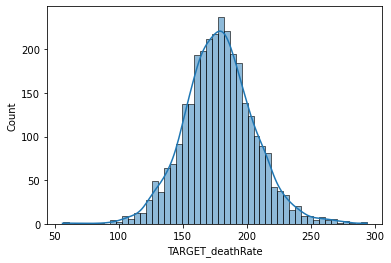

In [20]:
# Distribuição é assimétrica

sns.histplot(data=df, x="TARGET_deathRate", kde=True);

In [24]:
# Skewness muito próximo de zero significando uma curva simétrica.

df["TARGET_deathRate"].skew()

0.12931340277335948

    3.1. Como é a distribuição da feature escolhida? Ela possui outliers? Precisa de alguma limpeza nos dados?

In [11]:
# A feature escolhida é a "avgDeathsPerYear" pois tem a maior correlação(0.672511) com o target "TARGET_deathRate"

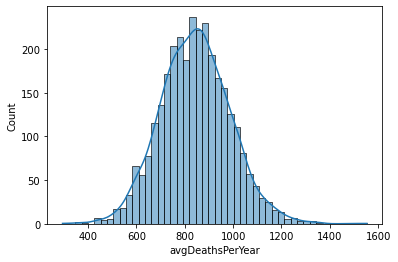

In [22]:
# Distribuição assimetrica da avgDeathsPerYear

sns.histplot(data=df, x="avgDeathsPerYear", kde=True);

In [23]:
# Skewness muito próximo de zero significando uma curva simétrica.

df["avgDeathsPerYear"].skew()

0.15836375418940316

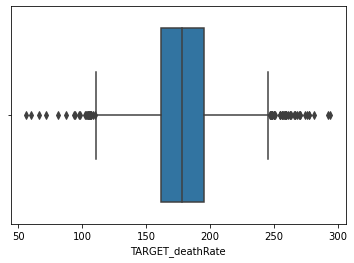

In [15]:
# Procura por outliers
# Sim, exitem outliers, representados pelos pontos pretos das extremidades

sns.boxplot(x="TARGET_deathRate", data=df);

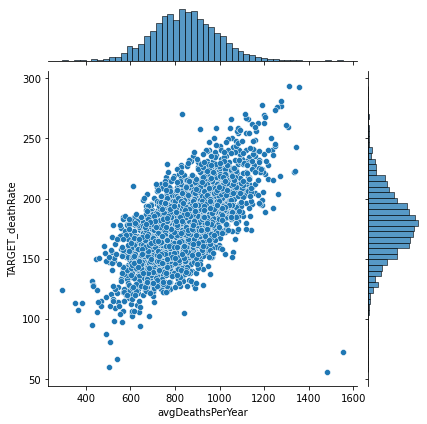

In [25]:
# explore agora a relação entre essas variáveis e o target
# dica: faça um jointplot ou scatterplot

sns.jointplot(data=df,x='avgDeathsPerYear', y='TARGET_deathRate')
plt.show()

In [26]:
# identifique os outliers

df[df['avgDeathsPerYear']>1400]['avgDeathsPerYear']

1220    1553.351487
1489    1483.055135
Name: avgDeathsPerYear, dtype: float64

In [29]:
# remova os outliers

df = df[~(df['avgDeathsPerYear']>1400)]

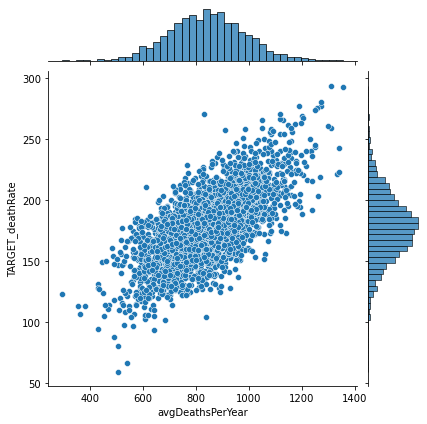

In [30]:
# faça o scatterplot novamente para verificar se os outliers sumiram

sns.jointplot(data=df,x='avgDeathsPerYear', y='TARGET_deathRate')
plt.show()

In [16]:
# Limpeza de dados - verificar ocorrência de valores nulos

df.select_dtypes(include=[np.number]).isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRat

In [18]:
# Limpeza de dados - selecione todas as outras colunas numéricas como a variável de features X
# dica: df.select_dtypes(include=[np.number])

df = df.select_dtypes(include=[np.number])
df = df.dropna(axis='columns', how='any')

In [19]:
# Limpeza de dados - Verificando novamente a ocorrência de valores nulos

df.isnull().sum()

avgAnnCount               0
avgDeathsPerYear          0
TARGET_deathRate          0
incidenceRate             0
medIncome                 0
popEst2015                0
povertyPercent            0
studyPerCap               0
MedianAge                 0
MedianAgeMale             0
MedianAgeFemale           0
AvgHouseholdSize          0
PercentMarried            0
PctNoHS18_24              0
PctHS18_24                0
PctBachDeg18_24           0
PctHS25_Over              0
PctBachDeg25_Over         0
PctUnemployed16_Over      0
PctPrivateCoverage        0
PctEmpPrivCoverage        0
PctPublicCoverage         0
PctPublicCoverageAlone    0
PctWhite                  0
PctBlack                  0
PctAsian                  0
PctOtherRace              0
PctMarriedHouseholds      0
BirthRate                 0
dtype: int64

    3.2. Treine um modelo de Regressão Linear Simples com o objetivo de predizer a variável dependente 'TARGET_deathRate'. Apresente o modelo treinado e avalie a normalidade dos resíduos. Não esqueça de dividir o dataset em treino e teste para uma posterior avaliação do modelo.

In [31]:
# crie duas variáveis, X e y, respectivamente os arrays da feature avgDeathsPerYear e do target
X = df['avgDeathsPerYear']
y = df['TARGET_deathRate']

In [32]:
# 1) Importe a classe do estimador que se deseja treinar
from sklearn.linear_model import LinearRegression

In [35]:
# 2) Instancie a classe do estimador, escolhendo os hiperparâmetros desejados
reg_lin = LinearRegression()

In [36]:
# 3) Separe os dados em dados de treino e dados de teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3)

In [37]:
#shape de X e y
X.shape, y.shape

((3045,), (3045,))

In [38]:
X_test.shape, y_test.shape

((609,), (609,))

In [39]:
X_train.shape, y_train.shape

((2436,), (2436,))

In [40]:
# reshape

X_train.values.reshape(-1, 1).shape

(2436, 1)

In [41]:
X_train.values.reshape(-1, 1)

array([[ 842.7636901 ],
       [ 949.93021594],
       [1134.80384138],
       ...,
       [ 689.15298235],
       [ 829.53544038],
       [ 899.70626479]])

In [42]:
# 4) Treine o modelo, usando os dados de treino. 

reg_lin.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

    3.3 Utilizando as métricas de avaliação verifique o resultado do modelo para o conjunto de dados de teste.

In [43]:
# pegue o intercept. Dica: veja os atributos do modelo treinado!
reg_lin.intercept_

62.71553899101863

In [44]:
# peque o coeficiente angular. Dica: veja os atributos do modelo treinado!
reg_lin.coef_[0]

0.1373212837577564

In [45]:
reg_lin.coef_

array([0.13732128])

# Conclusão

A taxa mínima de mortes por cancêr é de 62 a cada 100 mil habitantes.

Aumentando a variável avgDeathsPerYear em um ponto percentual faz com que a TARGET_deathRate aumente 13%.

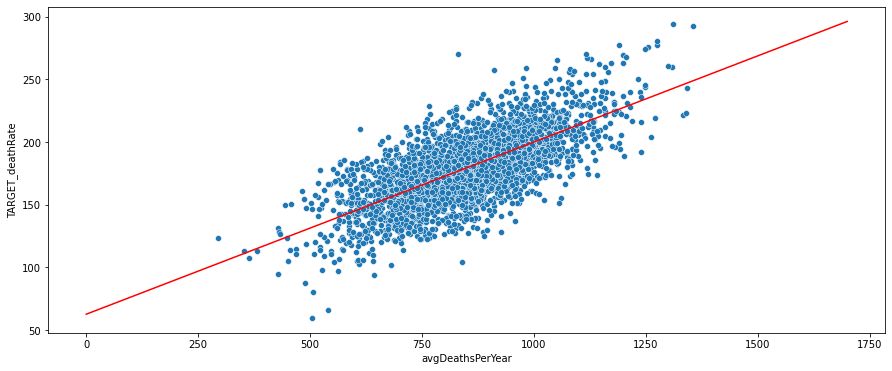

In [53]:
# Visualizando o modelo treinado

plt.figure(figsize=(15, 6))

# faça um scatterplot da fgeature pelo target
sns.scatterplot(data=df, x="avgDeathsPerYear", y="TARGET_deathRate")

# faça um plot da reta do modelo
# crie um array com os valores de x. dica:  use o range aproximado da variável GrLivArea
# crie um array de y com a equação da reta usando os coeficientes encontrados
x = np.linspace(0, 1700, 10000)
y = reg_lin.intercept_ + reg_lin.coef_[0]*x
plt.plot(x, y, color="red");

In [70]:
#Residuo
residuo = y_test - y_pred
residuo

1287     3.901862
642    -19.694646
1146    -9.247991
1279    12.589924
1941   -70.539109
          ...    
1920   -14.839293
2884    19.652392
2405     7.621413
498    -15.095424
2829   -19.031153
Name: TARGET_deathRate, Length: 609, dtype: float64

In [71]:
# Estatísticas descritivas do resíduo
residuo.describe()

count    609.000000
mean       0.116635
std       19.536420
min      -70.539109
25%      -13.073168
50%       -0.583214
75%       13.081929
max       61.027283
Name: TARGET_deathRate, dtype: float64

Intercepto: 62.71553899101863
Coeficienter angular: [0.13732128]

####################################################



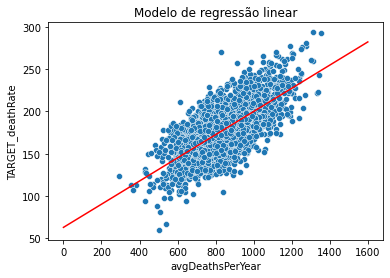


####################################################



In [62]:
# 4) Treinamento
modelo = reg_lin.fit(np.array(X_train).reshape(-1, 1), y_train)

print("Intercepto:", modelo.intercept_)
print("Coeficienter angular:", modelo.coef_)

print("\n####################################################\n")

plt.title("Modelo de regressão linear")

sns.scatterplot(data=df, x="avgDeathsPerYear", y="TARGET_deathRate")

x = np.linspace(0, 1600, 10000)
y = modelo.intercept_ + modelo.coef_[0]*x
plt.plot(x, y, color="red")
plt.show()

print("\n####################################################\n")

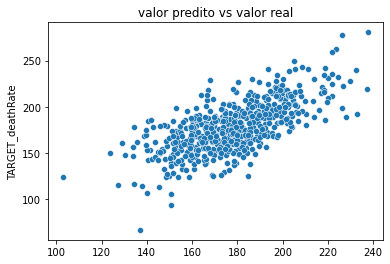

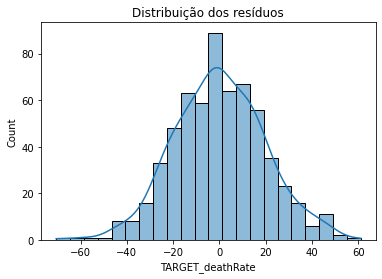


####################################################



In [64]:
# 5) Teste
predictions = modelo.predict(np.array(X_test).reshape(-1, 1))

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_test)
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_test-predictions, kde=True)
plt.show()

print("\n####################################################\n")

In [67]:
# 6) Métricas de avaliação
# Use o modelo treinado para fazer previsões usando os dados de teste 

y_pred = reg_lin.predict(X_test.values.reshape(-1,1))

print("\nMétricas de avaliação(dados de teste):")
 
from sklearn import metrics

print('\nR^2:', metrics.r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', metrics.mean_squared_error(y_test, y_pred,squared=False))


Métricas de avaliação(dados de teste):

R^2: 0.46799819149288
MAE: 15.434911353896473
MSE: 381.0586034891743
RMSE: 19.520722412072107


4. Agora, treine um modelo de Regressão Linear múltipla sem utilizar o min-max scaler e outro com o min-max scaler. Qual obteve o melhor resultado no teste? Quais são as features mais importantes?

In [72]:
# Verificando novamente os dados do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3045 entries, 0 to 3046
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avgAnnCount             3045 non-null   float64
 1   avgDeathsPerYear        3045 non-null   float64
 2   TARGET_deathRate        3045 non-null   float64
 3   incidenceRate           3045 non-null   float64
 4   medIncome               3045 non-null   float64
 5   popEst2015              3045 non-null   float64
 6   povertyPercent          3045 non-null   float64
 7   studyPerCap             3045 non-null   float64
 8   MedianAge               3045 non-null   float64
 9   MedianAgeMale           3045 non-null   float64
 10  MedianAgeFemale         3045 non-null   float64
 11  AvgHouseholdSize        3045 non-null   float64
 12  PercentMarried          3045 non-null   float64
 13  PctNoHS18_24            3045 non-null   float64
 14  PctHS18_24              3045 non-null   

In [73]:
# Selecionar somente as features numéricas
df.select_dtypes(include=[np.number]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3045 entries, 0 to 3046
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avgAnnCount             3045 non-null   float64
 1   avgDeathsPerYear        3045 non-null   float64
 2   TARGET_deathRate        3045 non-null   float64
 3   incidenceRate           3045 non-null   float64
 4   medIncome               3045 non-null   float64
 5   popEst2015              3045 non-null   float64
 6   povertyPercent          3045 non-null   float64
 7   studyPerCap             3045 non-null   float64
 8   MedianAge               3045 non-null   float64
 9   MedianAgeMale           3045 non-null   float64
 10  MedianAgeFemale         3045 non-null   float64
 11  AvgHouseholdSize        3045 non-null   float64
 12  PercentMarried          3045 non-null   float64
 13  PctNoHS18_24            3045 non-null   float64
 14  PctHS18_24              3045 non-null   

In [74]:
# Verificar ocorrência de valores nulos
df.select_dtypes(include=[np.number]).isnull().sum()

avgAnnCount               0
avgDeathsPerYear          0
TARGET_deathRate          0
incidenceRate             0
medIncome                 0
popEst2015                0
povertyPercent            0
studyPerCap               0
MedianAge                 0
MedianAgeMale             0
MedianAgeFemale           0
AvgHouseholdSize          0
PercentMarried            0
PctNoHS18_24              0
PctHS18_24                0
PctBachDeg18_24           0
PctHS25_Over              0
PctBachDeg25_Over         0
PctUnemployed16_Over      0
PctPrivateCoverage        0
PctEmpPrivCoverage        0
PctPublicCoverage         0
PctPublicCoverageAlone    0
PctWhite                  0
PctBlack                  0
PctAsian                  0
PctOtherRace              0
PctMarriedHouseholds      0
BirthRate                 0
dtype: int64

In [75]:
# Criando o X e o y
X = df.drop(columns=['TARGET_deathRate'])
y = df['TARGET_deathRate']

In [76]:
# Nomes das features
X.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [77]:
# Shape de X
X.shape

(3045, 28)

Intercepto: 78.67918579983944
Coeficientes Angulares: [-8.33234940e-04  8.92949693e-02  1.31111612e-01  1.23092538e-04
  2.23859004e-06  3.05404944e-01 -4.23993620e-04 -2.82786516e-03
 -5.19982795e-01  1.57491118e-01 -6.22216474e-01  5.93588793e-01
 -8.25160211e-02  1.52769143e-01 -9.33749122e-02  2.96724356e-01
 -7.99765058e-01  4.81179595e-01 -5.00599499e-01  2.51544487e-01
  9.58793976e-02 -1.19947456e-01 -4.22518139e-02 -5.60507803e-02
 -2.30410922e-02 -8.16463859e-01 -7.41209452e-01 -4.13002645e-01]

####################################################



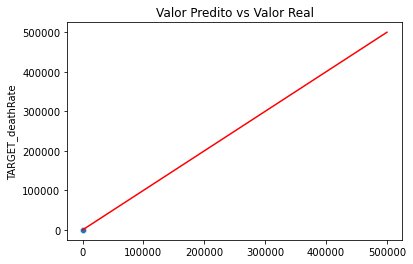

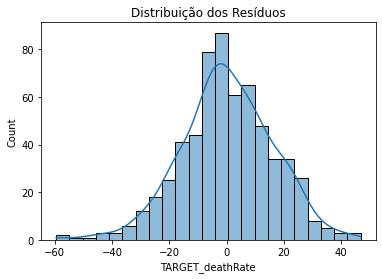


####################################################


Métricas de avaliação (dados de teste):

R^2: 0.6400611996862186
MAE: 12.527494676660293
MSE: 257.81449310111265
RMSE: 16.05660278829593


In [81]:
# Etapas da modelagem

# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# 4)
modelo = estimador.fit(X_treino,y_treino)

print("Intercepto:", modelo.intercept_ )
print("Coeficientes Angulares:",modelo.coef_ )

print("\n####################################################\n")

# 5)
predictions = modelo.predict(X_teste)


plt.title("Valor Predito vs Valor Real")
sns.scatterplot(x=predictions, y=y_teste)
plt.plot(np.linspace(0, 500000, 1000), np.linspace(0, 500000, 1000), color="red")
plt.show()

plt.title("Distribuição dos Resíduos")
sns.histplot(y_teste-predictions, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação (dados de teste):\n")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_teste, predictions))
print('MAE:', metrics.mean_absolute_error(y_teste, predictions))
print('MSE:', metrics.mean_squared_error(y_teste, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, predictions)))

In [82]:
#Coeficientes angulares
modelo.coef_

array([-8.33234940e-04,  8.92949693e-02,  1.31111612e-01,  1.23092538e-04,
        2.23859004e-06,  3.05404944e-01, -4.23993620e-04, -2.82786516e-03,
       -5.19982795e-01,  1.57491118e-01, -6.22216474e-01,  5.93588793e-01,
       -8.25160211e-02,  1.52769143e-01, -9.33749122e-02,  2.96724356e-01,
       -7.99765058e-01,  4.81179595e-01, -5.00599499e-01,  2.51544487e-01,
        9.58793976e-02, -1.19947456e-01, -4.22518139e-02, -5.60507803e-02,
       -2.30410922e-02, -8.16463859e-01, -7.41209452e-01, -4.13002645e-01])

In [83]:
#Coeficiente linear
modelo.intercept_

78.67918579983944

In [108]:
# Usando o código abaixo para fazer um dataframe com os coeficientes
coeff_df = pd.DataFrame(modelo.coef_, X.columns, columns=['Parameter value'])
coeff_df

,Parameter value
avgAnnCount,-0.000833
avgDeathsPerYear,0.089295
incidenceRate,0.131112
medIncome,0.000123
popEst2015,0.000002
povertyPercent,0.305405
studyPerCap,-0.000424
MedianAge,-0.002828
MedianAgeMale,-0.519983
MedianAgeFemale,0.157491


In [111]:
from sklearn.preprocessing import MinMaxScaler 

#1) Instanciar o scaler
mms = MinMaxScaler()

#2) Treinar o scaler com os dados de treino
mms.fit(X_treino)

#3) Transformando os dados
X_treino_scaled = mms.transform(X_treino)
X_teste_scaled = mms.transform(X_teste)

Intercepto: 59.69999999999975
Coeficientes angulares: [ 7.06019683e-14  2.02013366e-13  2.34200000e+02 -1.45792320e-13
 -3.14850265e-14  5.13243106e-14  7.30281133e-14 -1.54482699e-13
 -2.35535153e-14  4.74153764e-15  4.14328210e-14  6.18829124e-14
  4.32845717e-14 -4.27098321e-14 -1.16505827e-14  3.06168164e-14
 -6.13852679e-16  1.60029486e-14  1.17433578e-13  1.63049334e-13
  5.81719263e-15 -1.01332906e-13  9.96956305e-14  1.01214237e-14
  8.55274074e-15  4.32099683e-14 -2.84181673e-14 -5.69326093e-14
  3.75293201e-14]

####################################################



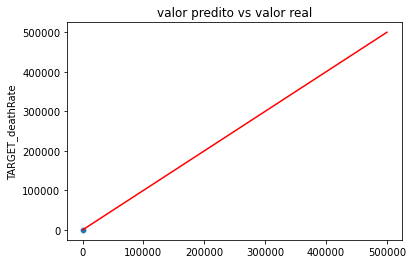

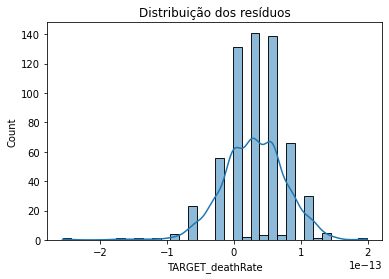


####################################################


Métricas de avaliação (dados de teste):

R^2: 1.0
MAE: 4.3145928355350585e-14
MSE: 3.0948839738546667e-27
RMSE: 5.563168138619097e-14


In [114]:
X = df
y = df['TARGET_deathRate']

# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# NOVO: aplicando o scaler!! - usamos o minmax pra que todas as features
# tenham o mesmo intervalo no espaço amostral - (0, 1)
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

# agora, vamos FITAR o scaler COM OS DADOS DE TREINO
mms.fit(X_treino)

# transformando os dados
X_treino = mms.transform(X_treino)
X_teste = mms.transform(X_teste)

#X_treino = mms.fit_transform(X_treino)
#X_teste = mms.transform(X_teste)


# 4)
modelo = estimador.fit(X_treino, y_treino)

print("Intercepto:", modelo.intercept_)
print("Coeficientes angulares:", modelo.coef_)

print("\n####################################################\n")

# 5)
predictions = modelo.predict(X_teste)

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_teste)
plt.plot(np.linspace(0, 500000, 1000), np.linspace(0, 500000, 1000), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_teste-predictions, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação (dados de teste):\n")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_teste, predictions))
print('MAE:', metrics.mean_absolute_error(y_teste, predictions))
print('MSE:', metrics.mean_squared_error(y_teste, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, predictions)))

Métricas de avaliação (dados de teste):

R^2: 0.6400611996862186

MAE: 12.527494676660293

MSE: 257.81449310111265

RMSE: 16.05660278829593

In [116]:
# Avaliando os coeficientes agora que todas as features estão na mesma escala
coeff_df = pd.DataFrame(modelo.coef_, X.columns, columns=['Parameter value'])

coeff_df.abs().sort_values(by='Parameter value',ascending=False)

,Parameter value
TARGET_deathRate,2.342000e+02
avgDeathsPerYear,2.020134e-13
PctPrivateCoverage,1.630493e-13
studyPerCap,1.544827e-13
incidenceRate,1.457923e-13
PctUnemployed16_Over,1.174336e-13
PctPublicCoverage,1.013329e-13
PctPublicCoverageAlone,9.969563e-14
povertyPercent,7.302811e-14
avgAnnCount,7.060197e-14


5. Compare os três modelos desenvolvidos.

# O modelo de Regressão Linear múltipla com utilização do min-max scaler 
# teve o melhor desempenho pois obteve os menores valores de erro, medido com as métricas 
# RMSE, MAE, MSE e R^2. Isso significa que a acurácia do modelo foi melhor e se aproximou 
# mais do target. Quanto menor, melhor.